In [2]:
import sys
sys.path.insert(1, '/Users/Andrew/Documents/PhD/Scripts/Python/pygplates_rev12')
import pygplates
import numpy as np
import glob
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid

%matplotlib inline

/Users/Andrew/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
StepRate = np.zeros(60)
StepTime = np.arange(650,805,5) #for colorbar plotting
StepTime_ML = ([ 650.,  655.,  655.,  660.,  660.,  665.,  665.,  670.,  670.,
        675.,  675.,  680.,  680.,  685.,  685.,  690.,  690.,  695.,
        695.,  700.,  700.,  705.,  705.,  710.,  710.,  715.,  715.,
        720.,  720.,  725.,  725.,  730.,  730.,  735.,  735.,  740.,
        740.,  745.,  745.,  750.,  750.,  755.,  755.,  760.,  760.,
        765.,  765.,  770.,  770.,  775.,  775.,  780.,  780.,  785.,
        785.,  790.,  790.,  795.,  795.,  800.])
min_spreading_rate = np.full_like(StepRate, 20)
max_spreading_rate = np.full_like(StepRate, 70)

max_spreading_rate_trim = np.hstack((max_spreading_rate[0],max_spreading_rate[0::2]))
min_spreading_rate_trim = np.hstack((min_spreading_rate[0],min_spreading_rate[0::2]))

In [4]:
empty_775_nans = np.empty(10,)
empty_775_nans[:] = np.nan

empty_750_nans = np.empty(20,)
empty_750_nans[:] = np.nan

empty_725_nans = np.empty(30,)
empty_725_nans[:] = np.nan

In [5]:
AUSWUS_rate_800 = np.asarray([ 56.9277533,  56.9277533,  56.9277533,  56.9277533,
        56.9277533,  56.9277533,  56.9277533,  56.9277533,
        56.9277533,  56.9277533,  56.9277533,  56.9277533,
        56.9277533,  56.9277533,  56.9277533,  56.9277533,
        56.9277533,  56.9277533,  56.9277533,  56.9277533,
        56.9277533,  56.9277533,  56.9277533,  56.9277533,
        56.9277533,  56.9277533,  56.9277533,  56.9277533,
        56.9277533,  56.9277533,  56.9277533,  56.9277533,
        56.9277533,  56.9277533,  56.9277533,  56.9277533,
        56.9277533,  56.9277533,  56.9277533,  56.9277533,
        57.70313296 ,  57.70313296 ,  57.70313296 ,  57.70313296 ,
        57.70313296 ,  57.70313296 ,  57.70313296 ,  57.70313296 ,
        57.70313296 ,  57.70313296 ,  57.70313296 ,  57.70313296 ,
        57.70313296 ,  57.70313296 ,  57.70313296 ,  57.70313296 ,
        57.70313296 ,  57.70313296 ,  57.70313296 ,  57.70313296])

AUSWUS_rate_775 = np.asarray([ 62.39411626,   62.39411626,   62.39411626,   62.39411626,
         62.39411626,   62.39411626,   62.39411626,   62.39411626,
         62.39411626,   62.39411626,   62.39411626,   62.39411626,
         62.39411626,   62.39411626,   62.39411626,   62.39411626,
         62.39411626,   62.39411626,   62.39411626,   62.39411626,
         62.39411626,   62.39411626,   62.39411626,   62.39411626,
         62.39411626,   62.39411626,   62.39411626,   62.39411626,
         62.39411626,   62.39411626,   62.39411626,   62.39411626,
         62.39411626,   62.39411626,   62.39411626,   62.39411626,
         62.39411626,   62.39411626,   62.39411626,   62.39411626,
        110.2789508 ,  110.2789508 ,  110.2789508 ,  110.2789508 ,
        110.2789508 ,  110.2789508 ,  110.2789508 ,  110.2789508 ,
        110.2789508 ,  110.2789508 ])

AUSWUS_rate_775 = np.hstack((AUSWUS_rate_775, empty_775_nans))

AUSWUS_rate_750 = np.full_like(StepRate, 90.264809227)
AUSWUS_rate_750[-20:] = np.nan

AUSWUS_rate_725 = np.full_like(StepRate, 120.344591269)
AUSWUS_rate_725[-30:] = np.nan

AUSWUS_rate_800_trim = np.hstack((AUSWUS_rate_800[0],AUSWUS_rate_800[0::2]))
AUSWUS_rate_775_trim = np.hstack((AUSWUS_rate_775[0],AUSWUS_rate_775[0::2]))
AUSWUS_rate_750_trim = np.hstack((AUSWUS_rate_750[0],AUSWUS_rate_750[0::2]))
AUSWUS_rate_725_trim = np.hstack((AUSWUS_rate_725[0],AUSWUS_rate_725[0::2]))

In [16]:
AUSMEX_rate_800 = np.asarray([ 55.14953363,  55.14953363,  55.14953363,  55.14953363,
        55.14953363,  55.14953363,  55.14953363,  55.14953363,
        55.14953363,  55.14953363,  55.14953363,  55.14953363,
        55.14953363,  55.14953363,  55.14953363,  55.14953363,
        55.14953363,  55.14953363,  55.14953363,  55.14953363,
        55.14953363,  55.14953363,  55.14953363,  55.14953363,
        55.14953363,  55.14953363,  55.14953363,  55.14953363,
        55.14953363,  55.14953363,  55.14953363,  55.14953363,
        55.14953363,  55.14953363,  55.14953363,  55.14953363,
        55.14953363,  55.14953363,  55.14953363,  55.14953363,
        78.34865397,  78.34865397,  78.34865397,  78.34865397,
        78.34865397,  78.34865397,  78.34865397,  78.34865397,
        78.34865397,  78.34865397,  78.34865397,  78.34865397,
        78.34865397,  78.34865397,  78.34865397,  78.34865397,
        78.34865397,  78.34865397,  78.34865397,  78.34865397])

AUSMEX_rate_775 = np.asarray([  60.24401738,   60.24401738,   60.24401738,   60.24401738,
         60.24401738,   60.24401738,   60.24401738,   60.24401738,
         60.24401738,   60.24401738,   60.24401738,   60.24401738,
         60.24401738,   60.24401738,   60.24401738,   60.24401738,
         60.24401738,   60.24401738,   60.24401738,   60.24401738,
         60.24401738,   60.24401738,   60.24401738,   60.24401738,
         60.24401738,   60.24401738,   60.24401738,   60.24401738,
         60.24401738,   60.24401738,   60.24401738,   60.24401738,
         60.24401738,   60.24401738,   60.24401738,   60.24401738,
         60.24401738,   60.24401738,   60.24401738,   60.24401738,
        123.5498209 ,  123.5498209 ,  123.5498209 ,  123.5498209 ,
        123.5498209 ,  123.5498209 ,  123.5498209 ,  123.5498209 ,
        123.5498209 ,  123.5498209 ])

AUSMEX_rate_775 = np.hstack((AUSMEX_rate_775, empty_775_nans))

AUSMEX_rate_750 = np.full_like(StepRate, 85)
AUSMEX_rate_750[-20:] = np.nan

AUSMEX_rate_725 = np.full_like(StepRate, 113)
AUSMEX_rate_725[-30:] = np.nan

AUSMEX_rate_800_trim = np.hstack((AUSMEX_rate_800[0],AUSMEX_rate_800[0::2]))
AUSMEX_rate_775_trim = np.hstack((AUSMEX_rate_775[0],AUSMEX_rate_775[0::2]))
AUSMEX_rate_750_trim = np.hstack((AUSMEX_rate_750[0],AUSMEX_rate_750[0::2]))
AUSMEX_rate_725_trim = np.hstack((AUSMEX_rate_725[0],AUSMEX_rate_725[0::2]))

In [17]:
np.mean(AUSMEX_rate_800)

62.882573743333339

In [7]:
ML_rate_800 = np.asarray([  205.49103971,  205.49103971,  202.51857781,  202.51857781,
        199.13728552,  199.13728552,  156.66446426,  156.66446426,
        157.29648956,  157.29648956,  157.31710513,  157.31710513,
        156.78691392,  156.78691392,  155.77664286,  155.77664286,
        154.36666625,  154.36666625,  152.64617642,  152.64617642,
         58.44695194,   58.44695194,   55.9979816 ,   55.9979816 ,
         53.49865692,   53.49865692,   50.95276436,   50.95276436,
         48.36458847,   48.36458847,   45.73905378,   45.73905378,
         43.08194743,   43.08194743,   40.40028347,   40.40028347,
         37.70293371,   37.70293371,   35.00179748,   35.00179748,
         15.44315382,   15.44315382,   17.6336597 ,   17.6336597 ,
         15.23950618,   15.23950618,   13.45773405,   13.45773405,
         13.22776935,   13.22776935,   13.66455975,   13.66455975,
        112.97247042,  112.97247042,  112.89959069,  112.89959069,
        112.82476473,  112.82476473,  112.74850325,  112.74850325])

ML_rate_775 = np.asarray([  203.09446631,  203.09446631,  199.77783622,  199.77783622,
        196.05961327,  196.05961327,  167.86399729,  167.86399729,
        166.97076082,  166.97076082,  165.01196096,  165.01196096,
        162.08967628,  162.08967628,  158.33221291,  158.33221291,
        153.8956308 ,  153.8956308 ,  148.9650132 ,  148.9650132 ,
         72.73105371,   72.73105371,   69.19698638,   69.19698638,
         65.65905942,   65.65905942,   62.14393575,   62.14393575,
         58.68462841,   58.68462841,   67.00998064,   67.00998064,
         65.3600138 ,   65.3600138 ,   63.6735868 ,   63.6735868 ,
         61.95583258,   61.95583258,   60.21242369,   60.21242369,
         28.65173402,   28.65173402,   14.30339042,   14.30339042,
         14.37936525,   14.37936525,   14.95742389,   14.95742389,
         15.89192817,   15.89192817])

ML_rate_775 = np.hstack((ML_rate_775, empty_775_nans))

ML_rate_750 = np.asarray([ 249.69065404,  249.69065404,  248.01100421,  248.01100421,
        246.21011412,  246.21011412,  131.66887117,  131.66887117,
        131.86329633,  131.86329633,  131.56622685,  131.56622685,
        130.82449827,  130.82449827,  129.69535687,  129.69535687,
        128.24595639,  128.24595639,  126.55256545,  126.55256545,
         50.80958386,   50.80958386,   48.9085925 ,   48.9085925 ,
         47.01303394,   47.01303394,   45.13491427,   45.13491427,
        115.07018381,  115.07018381,  111.4779046 ,  111.4779046 ,
         81.3128551 ,   81.3128551 ,   75.36824656,   75.36824656,
         69.7137282 ,   69.7137282 ,   64.53017347,   64.53017347])
ML_rate_750 = np.hstack((ML_rate_750, empty_750_nans))

ML_rate_725 = np.asarray([197.83578552,  197.83578552,  193.93809262,  193.93809262,
        189.66134093,  189.66134093,  213.77457196,  213.77457196,
        206.73371451,  206.73371451,  197.24196818,  197.24196818,
        185.41716981,  185.41716981,  171.47360317,  171.47360317,
        155.74200112,  155.74200112,  138.71083472,  138.71083472,
         87.41419997,   87.41419997,   83.98977393,   83.98977393,
         80.49859353,   80.49859353,   76.9484805 ,   76.9484805 ,
         73.34841852,   73.34841852])
ML_rate_725 = np.hstack((ML_rate_725, empty_725_nans))

ML_rate_750 = np.full_like(StepRate, 85)
ML_rate_750[-20:] = np.nan

ML_rate_725 = np.full_like(StepRate, 113)
ML_rate_725[-30:] = np.nan

ML_rate_800_trim = np.hstack((ML_rate_800[0],ML_rate_800[0::2]))
ML_rate_775_trim = np.hstack((ML_rate_775[0],ML_rate_775[0::2]))
ML_rate_750_trim = np.hstack((ML_rate_750[0],ML_rate_750[0::2]))
ML_rate_725_trim = np.hstack((ML_rate_725[0],ML_rate_725[0::2]))

In [8]:
SWEAT_rate_800 = np.asarray([ 74.19476715,  74.19476715,  74.19476715,  74.19476715,
        74.19476715,  74.19476715,  74.19476715,  74.19476715,
        74.19476715,  74.19476715,  74.19476715,  74.19476715,
        74.19476715,  74.19476715,  74.19476715,  74.19476715,
        74.19476715,  74.19476715,  74.19476715,  74.19476715,
        74.19476715,  74.19476715,  74.19476715,  74.19476715,
        74.19476715,  74.19476715,  74.19476715,  74.19476715,
        74.19476715,  74.19476715,  74.19476715,  74.19476715,
        74.19476715,  74.19476715,  74.19476715,  74.19476715,
        74.19476715,  74.19476715,  74.19476715,  74.19476715,
        80.15881651,  80.15881651,  80.15881651,  80.15881651,
        80.15881651,  80.15881651,  80.15881651,  80.15881651,
        80.15881651,  80.15881651,  80.15881651,  80.15881651,
        80.15881651,  80.15881651,  80.15881651,  80.15881651,
        80.15881651,  80.15881651,  80.15881651,  80.15881651])

SWEAT_rate_775 = np.asarray([  78.32979513,   78.32979513,   78.32979513,   78.32979513,
         78.32979513,   78.32979513,   78.32979513,   78.32979513,
         78.32979513,   78.32979513,   78.32979513,   78.32979513,
         78.32979513,   78.32979513,   78.32979513,   78.32979513,
         78.32979513,   78.32979513,   78.32979513,   78.32979513,
         78.32979513,   78.32979513,   78.32979513,   78.32979513,
         78.32979513,   78.32979513,   78.32979513,   78.32979513,
         78.32979513,   78.32979513,   78.32979513,   78.32979513,
         78.32979513,   78.32979513,   78.32979513,   78.32979513,
         78.32979513,   78.32979513,   78.32979513,   78.32979513,
        145.71582235,  145.71582235,  145.71582235,  145.71582235,
        145.71582235,  145.71582235,  145.71582235,  145.71582235,
        145.71582235,  145.71582235 ])

SWEAT_rate_775 = np.hstack((SWEAT_rate_775, empty_775_nans))

SWEAT_rate_750 = np.full_like(StepRate, 111)
SWEAT_rate_750[-20:] = np.nan

SWEAT_rate_725 = np.full_like(StepRate, 148)
SWEAT_rate_725[-30:] = np.nan

SWEAT_rate_800_trim = np.hstack((SWEAT_rate_800[0],SWEAT_rate_800[0::2]))
SWEAT_rate_775_trim = np.hstack((SWEAT_rate_775[0],SWEAT_rate_775[0::2]))
SWEAT_rate_750_trim = np.hstack((SWEAT_rate_750[0],SWEAT_rate_750[0::2]))
SWEAT_rate_725_trim = np.hstack((SWEAT_rate_725[0],SWEAT_rate_725[0::2]))

In [9]:
AUSWUS_orientation_800 = np.asarray([281.37749699,  281.37749699,  279.57181233,  279.57181233,
        277.75584008,  277.75584008,  275.9313427 ,  275.9313427 ,
        274.10015723,  274.10015723,  272.26418   ,  272.26418   ,
        270.42535017,  270.42535017,  268.58563232,  268.58563232,
        266.74699848,  266.74699848,  264.91141002,  264.91141002,
        263.0807998 ,  263.0807998 ,  261.25705493,  261.25705493,
        259.4420006 ,  259.4420006 ,  257.63738516,  257.63738516,
        255.84486692,  255.84486692,  254.0660026 ,  254.0660026 ,
        252.30223789,  252.30223789,  250.55489987,  250.55489987,
        248.82519158,  248.82519158,  247.11418848,  247.11418848,
        271.77577497,  271.77577497,  268.85914391,  268.85914391,
        265.94519222,  265.94519222,  263.03759285,  263.03759285,
        260.13989768,  260.13989768,  257.25548289,  257.25548289,
        254.38750082,  254.38750082,  251.53883951,  251.53883951,
        248.71209051,  248.71209051,  245.90952521,  245.90952521])

AUSWUS_orientation_775 = np.asarray([ 279.01689811,  279.01689811,  277.31312006,  277.31312006,
        275.59863968,  275.59863968,  273.87528624,  273.87528624,
        272.1449728 ,  272.1449728 ,  270.40968199,  270.40968199,
        268.67145021,  268.67145021,  266.93235039,  266.93235039,
        265.19447367,  265.19447367,  263.45991056,  263.45991056,
        261.73073171,  261.73073171,  260.008969  ,  260.008969  ,
        258.2965972 ,  258.2965972 ,  256.5955168 ,  256.5955168 ,
        254.90753817,  254.90753817,  253.23436758,  253.23436758,
        251.57759528,  251.57759528,  249.93868573,  249.93868573,
        248.31897014,  248.31897014,  246.71964147,  246.71964147,
        279.11186338,  279.11186338,  271.81583161,  271.81583161,
        264.50692603,  264.50692603,  257.2267414 ,  257.2267414 ,
        250.01393951,  250.01393951])

AUSWUS_orientation_775 = np.hstack((AUSWUS_orientation_775, empty_775_nans))

AUSWUS_orientation_750 = np.asarray([293.88928575,  293.88928575,  289.91709614,  289.91709614,
        285.86324702,  285.86324702,  281.73761719,  281.73761719,
        277.5527373 ,  277.5527373 ,  273.3235895 ,  273.3235895 ,
        269.06719117,  269.06719117,  264.80196698,  264.80196698,
        260.54695175,  260.54695175,  256.32090295,  256.32090295,
        252.14142448,  252.14142448,  248.02420382,  248.02420382,
        243.98244257,  243.98244257,  240.0265219 ,  240.0265219 ,
        236.16390285,  236.16390285,  232.39922754,  232.39922754,
        228.73456765,  228.73456765,  225.16976162,  225.16976162,
        221.70278849,  221.70278849,  218.33013815,  218.33013815])

AUSWUS_orientation_750 = np.hstack((AUSWUS_orientation_750, empty_750_nans))

AUSWUS_orientation_725 = np.asarray([293.43721569,  293.43721569,  288.12238387,  288.12238387,
        282.66801246,  282.66801246,  277.10066723,  277.10066723,
        271.45485986,  271.45485986,  265.77144696,  265.77144696,
        260.09488168,  260.09488168,  254.46967837,  254.46967837,
        248.93675233,  248.93675233,  243.5303725 ,  243.5303725 ,
        238.27625993,  238.27625993,  233.19098928,  233.19098928,
        228.28249758,  228.28249758,  223.55130965,  223.55130965,
        218.99207196,  218.99207196])

AUSWUS_orientation_725 = np.hstack((AUSWUS_orientation_725, empty_725_nans))

AUSWUS_orientation_800_trim = np.hstack((AUSWUS_orientation_800[0],AUSWUS_orientation_800[0::2]))
AUSWUS_orientation_775_trim = np.hstack((AUSWUS_orientation_775[0],AUSWUS_orientation_775[0::2]))
AUSWUS_orientation_750_trim = np.hstack((AUSWUS_orientation_750[0],AUSWUS_orientation_750[0::2]))
AUSWUS_orientation_725_trim = np.hstack((AUSWUS_orientation_725[0],AUSWUS_orientation_725[0::2]))

In [10]:
AUSMEX_orientation_800 = np.asarray([ 286.82683588,  286.82683588,  284.90303785,  284.90303785,
        282.96248301,  282.96248301,  281.00702405,  281.00702405,
        279.03865442,  279.03865442,  277.05949268,  277.05949268,
        275.07176386,  275.07176386,  273.07777841,  273.07777841,
        271.07990907,  271.07990907,  269.08056617,  269.08056617,
        267.08217217,  267.08217217,  265.08713585,  265.08713585,
        263.09782702,  263.09782702,  261.11655234,  261.11655234,
        259.14553275,  259.14553275,  257.18688318,  257.18688318,
        255.24259474,  255.24259474,  253.31451985,  253.31451985,
        251.40436036,  251.40436036,  249.51365872,  249.51365872,
        273.33736036,  273.33736036,  270.42054585,  270.42054585,
        267.5037568 ,  267.5037568 ,  264.59338085,  264.59338085,
        261.69564254,  261.69564254,  258.81648581,  258.81648581,
        255.96147051,  255.96147051,  253.13568655,  253.13568655,
        250.34368755,  250.34368755,  247.58944488,  247.58944488])

AUSMEX_orientation_775 = np.asarray([  284.38113124,  284.38113124,  282.39427311,  282.39427311,
        280.39164444,  280.39164444,  278.37554086,  278.37554086,
        276.34840873,  276.34840873,  274.31282002,  274.31282002,
        272.27144364,  272.27144364,  270.22701392,  270.22701392,
        268.18229728,  268.18229728,  266.140058  ,  266.140058  ,
        264.10302425,  264.10302425,  262.07385541,  262.07385541,
        260.05511157,  260.05511157,  258.04922622,  258.04922622,
        256.05848256,  256.05848256,  254.0849941 ,  254.0849941 ,
        252.13068953,  252.13068953,  250.19730218,  250.19730218,
        248.28636364,  248.28636364,  246.39920141,  246.39920141,
        282.11108636,  282.11108636,  276.86531231,  276.86531231,
        271.59731109,  271.59731109,  266.33372378,  266.33372378,
        261.10033657,  261.10033657])

AUSMEX_orientation_775 = np.hstack((AUSMEX_orientation_775, empty_775_nans))

AUSMEX_orientation_750 = np.asarray([299.37040643,  299.37040643,  296.15588206,  296.15588206,
        292.87790575,  292.87790575,  289.54167945,  289.54167945,
        286.1538372 ,  286.1538372 ,  282.72236662,  282.72236662,
        279.25644961,  279.25644961,  275.76622501,  275.76622501,
        272.26248588,  272.26248588,  268.75633324,  268.75633324,
        265.25881393,  265.25881393,  261.78057213,  261.78057213,
        258.33154094,  258.33154094,  254.92069364,  254.92069364,
        251.55586548,  251.55586548,  248.24364781,  248.24364781,
        244.98934907,  244.98934907,  241.79701198,  241.79701198,
        238.66947412,  238.66947412,  235.60845863,  235.60845863])

AUSMEX_orientation_750 = np.hstack((AUSMEX_orientation_750, empty_750_nans))

AUSMEX_orientation_725 = np.asarray([299.00137205,  299.00137205,  294.70076284,  294.70076284,
        290.29026384,  290.29026384,  285.78390522,  285.78390522,
        281.20007578,  281.20007578,  276.56090964,  276.56090964,
        271.89124481,  271.89124481,  267.21725904,  267.21725904,
        262.56496552,  262.56496552,  257.95878187,  257.95878187,
        253.42035763,  253.42035763,  248.96777382,  248.96777382,
        244.61514122,  244.61514122,  240.37255248,  240.37255248,
        236.24630193,  236.24630193])

AUSMEX_orientation_725 = np.hstack((AUSMEX_orientation_725, empty_725_nans))

AUSMEX_orientation_800_trim = np.hstack((AUSMEX_orientation_800[0],AUSMEX_orientation_800[0::2]))
AUSMEX_orientation_775_trim = np.hstack((AUSMEX_orientation_775[0],AUSMEX_orientation_775[0::2]))
AUSMEX_orientation_750_trim = np.hstack((AUSMEX_orientation_750[0],AUSMEX_orientation_750[0::2]))
AUSMEX_orientation_725_trim = np.hstack((AUSMEX_orientation_725[0],AUSMEX_orientation_725[0::2]))

In [11]:
ML_orientation_800 = np.asarray([  257.74687884,  257.74687884,  256.62628606,  256.62628606,
        255.98722443,  255.98722443,  305.92641928,  305.92641928,
        302.49589091,  302.49589091,  298.46438558,  298.46438558,
        293.82740161,  293.82740161,  288.5927399 ,  288.5927399 ,
        282.78417519,  282.78417519,  276.44423336,  276.44423336,
        329.25202245,  329.25202245,  326.64740464,  326.64740464,
        324.04184783,  324.04184783,  321.45466222,  321.45466222,
        318.91060559,  318.91060559,  316.44173514,  316.44173514,
        314.09035682,  314.09035682,  311.91398387,  311.91398387,
        309.99415658,  309.99415658,  308.4530742 ,  308.4530742 ,
        143.34314546,  143.34314546,  208.11034498,  208.11034498,
        197.76162182,  197.76162182,  174.1003185 ,  174.1003185 ,
        149.56125823,  149.56125823,  141.00895968,  141.00895968,
        322.45000643,  322.45000643,  317.60651245,  317.60651245,
        312.47605635,  312.47605635,  307.04248281,  307.04248281])

ML_orientation_775 = np.asarray([   257.26722804,  257.26722804,  256.20587591,  256.20587591,
        255.6400619 ,  255.6400619 ,  316.38075185,  316.38075185,
        311.60796173,  311.60796173,  306.05010547,  306.05010547,
        299.66512164,  299.66512164,  292.43289663,  292.43289663,
        284.36298504,  284.36298504,  275.49987855,  275.49987855,
        333.36185886,  333.36185886,  330.77629113,  330.77629113,
        328.35725837,  328.35725837,  326.17061637,  326.17061637,
        324.29646824,  324.29646824,  293.70779172,  293.70779172,
        291.46117454,  291.46117454,  289.23536636,  289.23536636,
        287.0487896 ,  287.0487896 ,  284.9212829 ,  284.9212829 ,
        234.17990082,  234.17990082,  308.60167715,  308.60167715,
        320.55648505,  320.55648505,  209.14000969,  209.14000969,
        215.55535432,  215.55535432])

ML_orientation_775 = np.hstack((ML_orientation_775, empty_775_nans))

ML_orientation_750 = np.asarray([267.94950383,  267.94950383,  267.7124956 ,  267.7124956 ,
        267.72032018,  267.72032018,  305.508572  ,  305.508572  ,
        303.19034346,  303.19034346,  300.33768826,  300.33768826,
        296.94913199,  296.94913199,  293.02757101,  293.02757101,
        288.58239046,  288.58239046,  283.63156551,  283.63156551,
          8.18012247,    8.18012247,    8.00334284,    8.00334284,
          7.97670027,    7.97670027,  128.123415  ,  128.123415  ,
         29.80757884,   29.80757884,   28.99884256,   28.99884256,
        326.56031735,  326.56031735,  322.69783793,  322.69783793,
        319.66646874,  319.66646874,  317.74463903,  317.74463903])

ML_orientation_750 = np.hstack((ML_orientation_750, empty_750_nans))

ML_orientation_725 = np.asarray([ 256.75543026,  256.75543026,  255.72505288,  255.72505288,
        255.21063041,  255.21063041,  334.0359352 ,  334.0359352 ,
        327.07573722,  327.07573722,  318.96480345,  318.96480345,
        309.52535879,  309.52535879,  298.61146084,  298.61146084,
        286.12214803,  286.12214803,  271.98786344,  271.98786344,
        276.25026407,  276.25026407,  270.22841835,  270.22841835,
        264.27837347,  264.27837347,  258.47308451,  258.47308451,
        252.87744065,  252.87744065])

ML_orientation_725 = np.hstack((ML_orientation_725, empty_725_nans))

#ML_orientation_800_trim = np.hstack((ML_orientation_800[0],ML_orientation_800[0::2]))
#ML_orientation_775_trim = np.hstack((ML_orientation_775[0],ML_orientation_775[0::2]))
#ML_orientation_750_trim = np.hstack((ML_orientation_750[0],ML_orientation_750[0::2]))
#ML_orientation_725_trim = np.hstack((ML_orientation_725[0],ML_orientation_725[0::2]))

In [12]:
SWEAT_orientation_800 = np.asarray([289.74823034,  289.74823034,  287.60007224,  287.60007224,
        285.40923923,  285.40923923,  283.17846158,  283.17846158,
        280.91104068,  280.91104068,  278.61085463,  278.61085463,
        276.28234603,  276.28234603,  273.9304892 ,  273.9304892 ,
        271.56073512,  271.56073512,  269.17893418,  269.17893418,
        266.79123789,  266.79123789,  264.40398341,  264.40398341,
        262.02356579,  262.02356579,  259.6563047 ,  259.6563047 ,
        257.30831284,  257.30831284,  254.9853734 ,  254.9853734 ,
        252.6928329 ,  252.6928329 ,  250.43551455,  250.43551455,
        248.21765516,  248.21765516,  246.04286656,  246.04286656,
        230.08181929,  230.08181929,  227.16628844,  227.16628844,
        224.33518048,  224.33518048,  221.58710547,  221.58710547,
        218.91969719,  218.91969719,  216.32982622,  216.32982622,
        213.81379048,  213.81379048,  211.36747867,  211.36747867,
        208.98650592,  208.98650592,  206.66632266,  206.66632266])

SWEAT_orientation_775 = np.asarray([   288.78736768,  288.78736768,  286.5873067 ,  286.5873067 ,
        284.34260185,  284.34260185,  282.05653143,  282.05653143,
        279.73302313,  279.73302313,  277.37665189,  277.37665189,
        274.99261504,  274.99261504,  272.58668172,  272.58668172,
        270.16511558,  270.16511558,  267.73457154,  267.73457154,
        265.30196969,  265.30196969,  262.87435183,  262.87435183,
        260.4587282 ,  260.4587282 ,  258.06192297,  258.06192297,
        255.69042763,  255.69042763,  253.35027065,  253.35027065,
        251.04691001,  251.04691001,  248.78515329,  248.78515329,
        246.56910702,  246.56910702,  244.40215493,  244.40215493,
        228.5235922 ,  228.5235922 ,  222.9932064 ,  222.9932064 ,
        217.73942873,  217.73942873,  212.74709825,  212.74709825,
        207.9931628 ,  207.9931628])

SWEAT_orientation_775 = np.hstack((SWEAT_orientation_775, empty_775_nans))

SWEAT_orientation_750 = np.asarray([283.52664906,  283.52664906,  279.74114355,  279.74114355,
        275.88050161,  275.88050161,  271.96186497,  271.96186497,
        268.00524356,  268.00524356,  264.03284035,  264.03284035,
        260.06809451,  260.06809451,  256.13453204,  256.13453204,
        252.25456294,  252.25456294,  248.44838256,  248.44838256,
        244.73311471,  244.73311471,  241.122281  ,  241.122281  ,
        237.62561442,  237.62561442,  234.24917596,  234.24917596,
        230.99569623,  230.99569623,  227.86505227,  227.86505227,
        224.85479792,  224.85479792,  221.96068541,  221.96068541,
        219.17713779,  219.17713779,  216.49765144,  216.49765144])

SWEAT_orientation_750 = np.hstack((SWEAT_orientation_750, empty_750_nans))

SWEAT_orientation_725 = np.asarray([283.19311369,  283.19311369,  278.12804582,  278.12804582,
        272.93922972,  272.93922972,  267.67073269,  267.67073269,
        262.37425561,  262.37425561,  257.10533332,  257.10533332,
        251.9185064 ,  251.9185064 ,  246.86249205,  246.86249205,
        241.97643324,  241.97643324,  237.28790874,  237.28790874,
        232.81277556,  232.81277556,  228.55641526,  228.55641526,
        224.51574973,  224.51574973,  220.68145077,  220.68145077,
        217.03995857,  217.03995857])

SWEAT_orientation_725 = np.hstack((SWEAT_orientation_725, empty_725_nans))

SWEAT_orientation_800_trim = np.hstack((SWEAT_orientation_800[0],SWEAT_orientation_800[0::2]))
SWEAT_orientation_775_trim = np.hstack((SWEAT_orientation_775[0],SWEAT_orientation_775[0::2]))
SWEAT_orientation_750_trim = np.hstack((SWEAT_orientation_750[0],SWEAT_orientation_750[0::2]))
SWEAT_orientation_725_trim = np.hstack((SWEAT_orientation_725[0],SWEAT_orientation_725[0::2]))

In [13]:
title_font_size = 25
ticks_font_size = 15
axis_font_size = 20

In [14]:
len(max_spreading_rate)

60

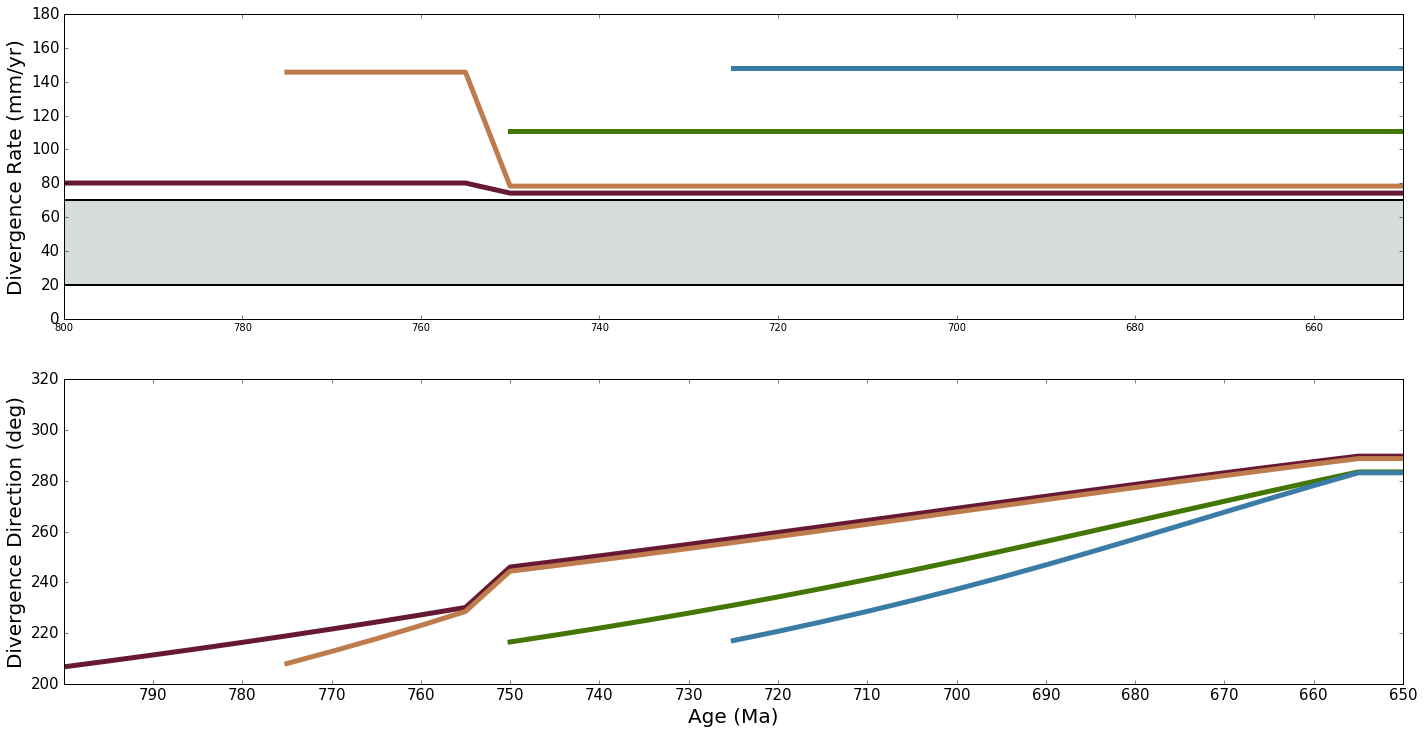

In [172]:
fig = plt.figure(figsize=(24,12),dpi=300)

plt.subplot(211)

plt.plot(StepTime,SWEAT_rate_800_trim,linewidth=5, ls='-', c='#671934')
plt.plot(StepTime,SWEAT_rate_775_trim,linewidth=5, ls='-', c='#BE7C4D')
plt.plot(StepTime,SWEAT_rate_750_trim,linewidth=5, ls='-', c='#447604')
plt.plot(StepTime,SWEAT_rate_725_trim,linewidth=5, ls='-', c='#3A7CA5')
plt.plot(StepTime,min_spreading_rate_trim,linewidth=2,c='k')
plt.plot(StepTime,max_spreading_rate_trim,linewidth=2,c='k')
plt.axhspan(20, 70, alpha=0.2, color='#354F52')

plt.subplot(212)

plt.plot(StepTime,SWEAT_orientation_800_trim,linewidth=5, ls='-', c='#671934')
plt.plot(StepTime,SWEAT_orientation_775_trim,linewidth=5, ls='-', c='#BE7C4D')
plt.plot(StepTime,SWEAT_orientation_750_trim,linewidth=5, ls='-', c='#447604')
plt.plot(StepTime,SWEAT_orientation_725_trim,linewidth=5, ls='-', c='#3A7CA5')

plt.subplot(211)
plt.xlim(800, 650)
plt.xticks(np.arange(650,800,10),fontsize=ticks_font_size)
#plt.xlabel('Age (Ma)',fontsize=axis_font_size)
#plt.ylim(200,320)
plt.ylim(0,180)
plt.ylabel('Divergence Rate (mm/yr)',fontsize=axis_font_size)
plt.yticks()fontsize=ticks_font_size)

plt.subplot(212)
plt.xlim(800, 650)
plt.xticks(np.arange(650,800,10),fontsize=ticks_font_size)
plt.xlabel('Age (Ma)',fontsize=axis_font_size)
plt.ylim(200,320)
plt.ylabel('Divergence Direction (deg)',fontsize=axis_font_size)
plt.yticks(fontsize=ticks_font_size)

fname = 'SWEAT_spreading_rates.pdf'
fig.savefig(fname, bbox_inches='tight', dpi=300)

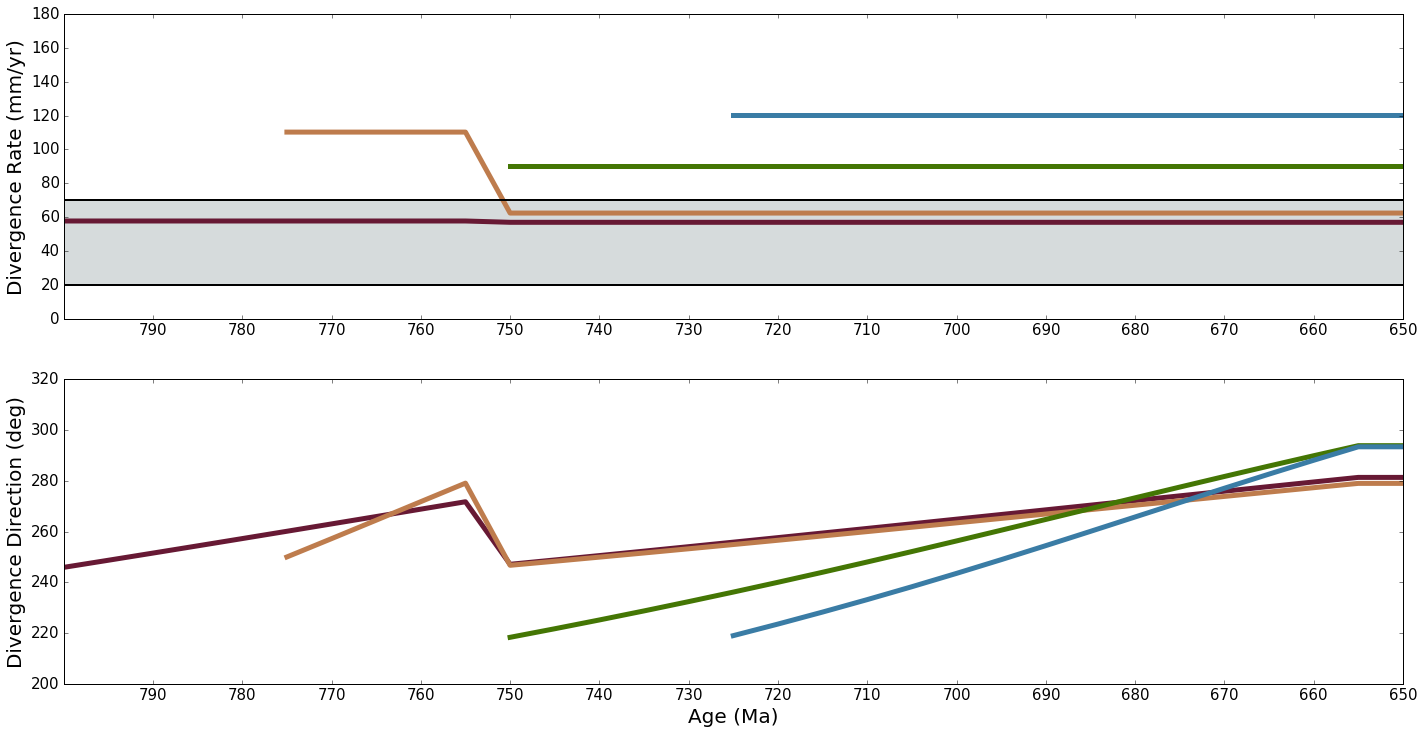

In [15]:
fig = plt.figure(figsize=(24,12),dpi=300)

plt.subplot(211)

plt.plot(StepTime,AUSWUS_rate_800_trim,linewidth=5, ls='-', c='#671934')
plt.plot(StepTime,AUSWUS_rate_775_trim,linewidth=5, ls='-', c='#BE7C4D')
plt.plot(StepTime,AUSWUS_rate_750_trim,linewidth=5, ls='-', c='#447604')
plt.plot(StepTime,AUSWUS_rate_725_trim,linewidth=5, ls='-', c='#3A7CA5')
plt.plot(StepTime,min_spreading_rate_trim,linewidth=2,c='k')
plt.plot(StepTime,max_spreading_rate_trim,linewidth=2,c='k')
plt.axhspan(20, 70, alpha=0.2, color='#354F52')

plt.subplot(212)

plt.plot(StepTime,AUSWUS_orientation_800_trim,linewidth=5, ls='-', c='#671934')
plt.plot(StepTime,AUSWUS_orientation_775_trim,linewidth=5, ls='-', c='#BE7C4D')
plt.plot(StepTime,AUSWUS_orientation_750_trim,linewidth=5, ls='-', c='#447604')
plt.plot(StepTime,AUSWUS_orientation_725_trim,linewidth=5, ls='-', c='#3A7CA5')

plt.subplot(211)
plt.xlim(800, 650)
plt.xticks(np.arange(650,800,10),fontsize=ticks_font_size)
#plt.xlabel('Age (Ma)',fontsize=axis_font_size)
#plt.ylim(200,320)
plt.ylim(0,180)
plt.ylabel('Divergence Rate (mm/yr)',fontsize=axis_font_size)
plt.yticks(fontsize=ticks_font_size)

plt.subplot(212)
plt.xlim(800, 650)
plt.xticks(np.arange(650,800,10),fontsize=ticks_font_size)
plt.xlabel('Age (Ma)',fontsize=axis_font_size)
plt.ylim(200,320)
plt.ylabel('Divergence Direction (deg)',fontsize=axis_font_size)
plt.yticks(fontsize=ticks_font_size)

fname = 'AUSWUS_spreading_rates.pdf'
fig.savefig(fname, bbox_inches='tight', dpi=300)

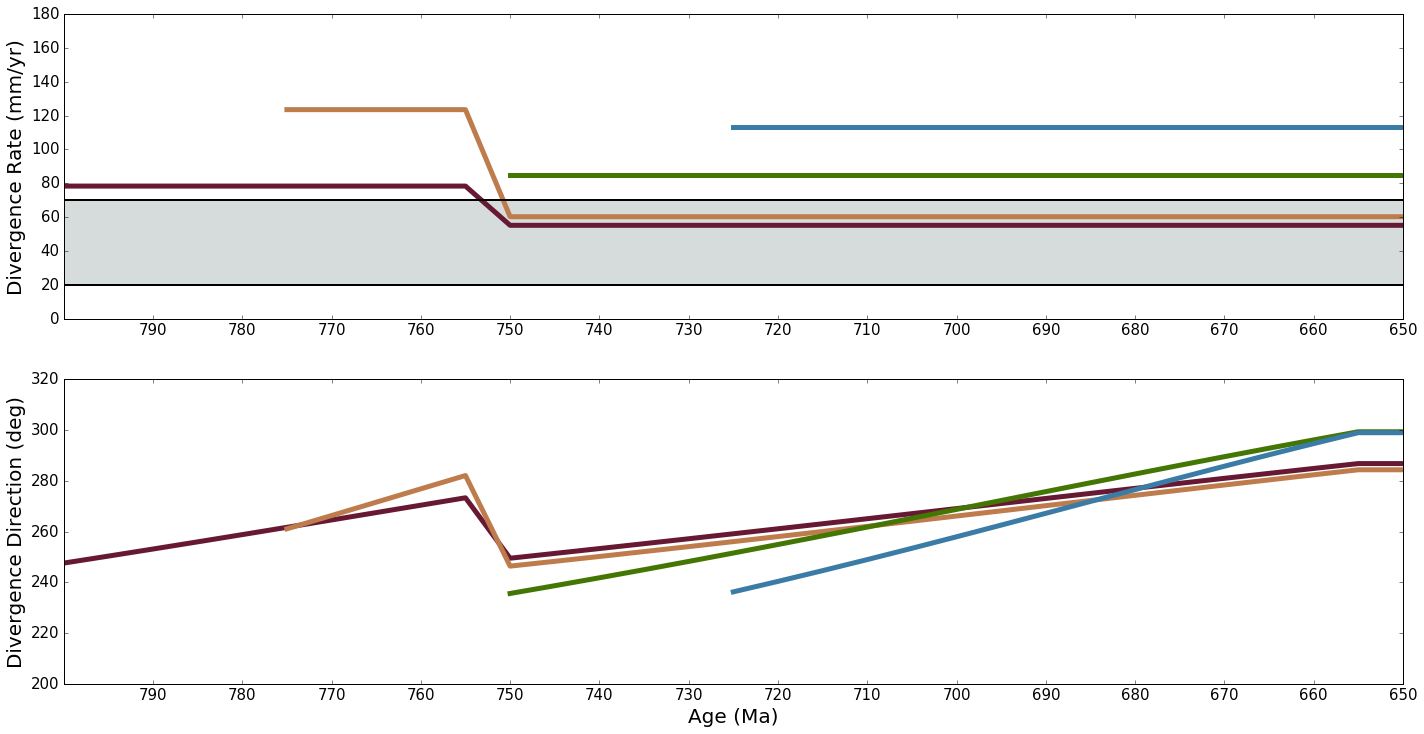

In [154]:
fig = plt.figure(figsize=(24,12),dpi=300)

plt.subplot(211)

plt.plot(StepTime,AUSMEX_rate_800_trim,linewidth=5, ls='-', c='#671934')
plt.plot(StepTime,AUSMEX_rate_775_trim,linewidth=5, ls='-', c='#BE7C4D')
plt.plot(StepTime,AUSMEX_rate_750_trim,linewidth=5, ls='-', c='#447604')
plt.plot(StepTime,AUSMEX_rate_725_trim,linewidth=5, ls='-', c='#3A7CA5')
plt.plot(StepTime,min_spreading_rate_trim,linewidth=2,c='k')
plt.plot(StepTime,max_spreading_rate_trim,linewidth=2,c='k')
plt.axhspan(20, 70, alpha=0.2, color='#354F52')

plt.subplot(212)

plt.plot(StepTime,AUSMEX_orientation_800_trim,linewidth=5, ls='-', c='#671934')
plt.plot(StepTime,AUSMEX_orientation_775_trim,linewidth=5, ls='-', c='#BE7C4D')
plt.plot(StepTime,AUSMEX_orientation_750_trim,linewidth=5, ls='-', c='#447604')
plt.plot(StepTime,AUSMEX_orientation_725_trim,linewidth=5, ls='-', c='#3A7CA5')

plt.subplot(211)
plt.xlim(800, 650)
plt.xticks(np.arange(650,800,10),fontsize=ticks_font_size)
#plt.xlabel('Age (Ma)',fontsize=axis_font_size)
#plt.ylim(200,320)
plt.ylim(0,180)
plt.ylabel('Divergence Rate (mm/yr)',fontsize=axis_font_size)
plt.yticks(fontsize=ticks_font_size)

plt.subplot(212)
plt.xlim(800, 650)
plt.xticks(np.arange(650,800,10),fontsize=ticks_font_size)
plt.xlabel('Age (Ma)',fontsize=axis_font_size)
plt.ylim(200,320)
plt.ylabel('Divergence Direction (deg)',fontsize=axis_font_size)
plt.yticks(fontsize=ticks_font_size)

fname = 'AUSMEX_spreading_rates.pdf'
fig.savefig(fname, bbox_inches='tight', dpi=300)

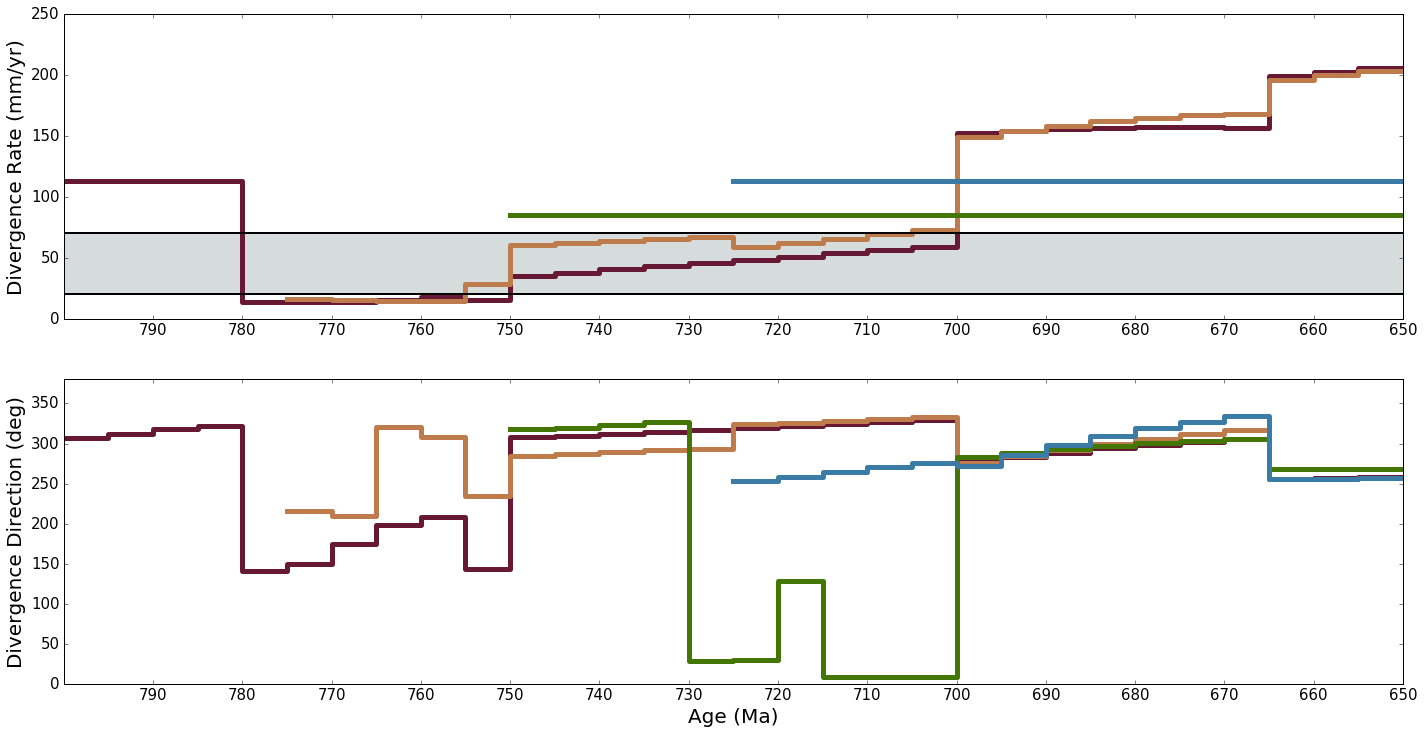

In [170]:
fig = plt.figure(figsize=(24,12),dpi=300)

plt.subplot(211)

plt.plot(StepTime_ML,ML_rate_800,linewidth=5, ls='-', c='#671934')
plt.plot(StepTime_ML,ML_rate_775,linewidth=5, ls='-', c='#BE7C4D')
plt.plot(StepTime_ML,ML_rate_750,linewidth=5, ls='-', c='#447604')
plt.plot(StepTime_ML,ML_rate_725,linewidth=5, ls='-', c='#3A7CA5')
plt.plot(StepTime_ML,min_spreading_rate,linewidth=2,c='k')
plt.plot(StepTime_ML,max_spreading_rate,linewidth=2,c='k')
plt.axhspan(20, 70, alpha=0.2, color='#354F52')

plt.subplot(212)

plt.plot(StepTime_ML,ML_orientation_800,linewidth=5, ls='-', c='#671934')
plt.plot(StepTime_ML,ML_orientation_775,linewidth=5, ls='-', c='#BE7C4D')
plt.plot(StepTime_ML,ML_orientation_750,linewidth=5, ls='-', c='#447604')
plt.plot(StepTime_ML,ML_orientation_725,linewidth=5, ls='-', c='#3A7CA5')

plt.subplot(211)
plt.xlim(800, 650)
plt.xticks(np.arange(650,800,10),fontsize=ticks_font_size)
#plt.xlabel('Age (Ma)',fontsize=axis_font_size)
#plt.ylim(200,320)
plt.ylim(0,250)
plt.ylabel('Divergence Rate (mm/yr)',fontsize=axis_font_size)
plt.yticks(fontsize=ticks_font_size)

plt.subplot(212)
plt.xlim(800, 650)
plt.xticks(np.arange(650,800,10),fontsize=ticks_font_size)
plt.xlabel('Age (Ma)',fontsize=axis_font_size)
plt.ylim(0,380)
plt.ylabel('Divergence Direction (deg)',fontsize=axis_font_size)
plt.yticks(fontsize=ticks_font_size)

fname = 'ML_spreading_rates.pdf'
fig.savefig(fname, bbox_inches='tight', dpi=300)